# l'API du site Flightradar24

Le but de ce notebook c'est de montrer comment obtenir de la donnée via une API et de ensuite de les utiliser.



*   [Site Flightradar24](https://www.flightradar24.com)
*   [API Flightradar24](https://pypi.org/project/FlightRadarAPI/)

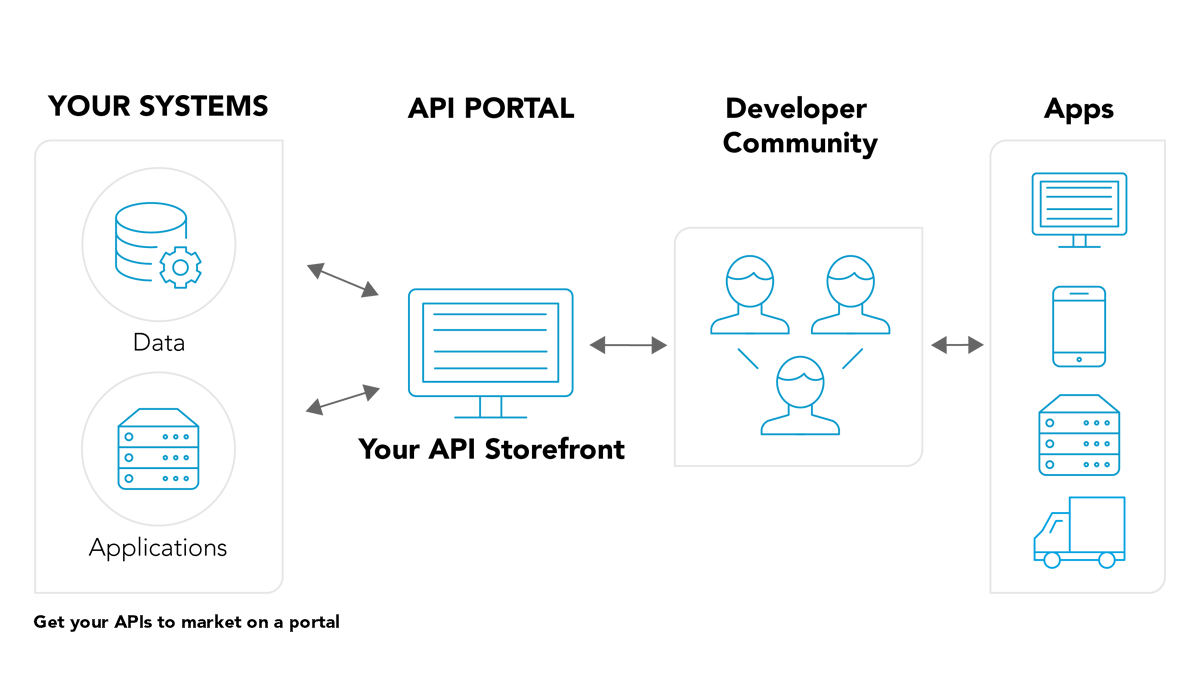

In [62]:
#Cette commande (!pip install) sert à installer la librarie Flightradar24 sur l'environnement python qui tourne google colab
!pip install FlightRadarAPI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
# On importe les fonctions dans l'API de FlightRadar24
from FlightRadar24.api import FlightRadar24API
# Quelques librairies que nous allons utiliser
import geopy.distance # (pour calculer des distances)
import pandas as pd
# On appellera l'API par fr_api
fr_api = FlightRadar24API()

In [64]:
# Utiliser la fonction help(---) pour voir les fonctions dans l'API
help(fr_api)

Help on FlightRadar24API in module FlightRadar24.api object:

class FlightRadar24API(builtins.object)
 |  Flight Radar 24 API
 |  
 |  Methods defined here:
 |  
 |  get_airline_logo(self, iata, icao)
 |  
 |  get_airlines(self)
 |  
 |  get_airport(self, code)
 |  
 |  get_airports(self)
 |  
 |  get_bounds(self, zone)
 |  
 |  get_country_flag(self, country)
 |  
 |  get_flight_details(self, flight_id)
 |  
 |  get_flights(self, airline=None, bounds=None)
 |      Parameter airline: must be the airline ICAO. Ex: "DAL"
 |      Parameter bounds: must be coordinates (y1, y2 ,x1, x2). Ex: "75.78,-75.78,-427.56,427.56"
 |  
 |  get_real_time_flight_tracker_config(self)
 |  
 |  get_zones(self)
 |  
 |  login(self, user, password)
 |  
 |  set_real_time_flight_tracker_config(self, **config)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weak

In [65]:
airports = fr_api.get_airports()
airlines = fr_api.get_airlines()
flights = fr_api.get_flights()
zones = fr_api.get_zones()

## Aeroports

In [66]:
# combient d'aeroports
len(airports)

4956

In [67]:
# afficher un aeroport
airports[10]

{'name': 'Aberdeen International Airport',
 'iata': 'ABZ',
 'icao': 'EGPD',
 'lat': 57.201939,
 'lon': -2.19777,
 'country': 'United Kingdom',
 'alt': 215}

In [68]:
#Creer un dataset pour les aeroports
name = [airports[i]['name'] for i in list(range(len(airports)))]

iata = [airports[i]['iata'] for i in list(range(len(airports)))]
icao = [airports[i]['icao'] for i in list(range(len(airports)))]
lat = [airports[i]['lat'] for i in list(range(len(airports)))]
lon = [airports[i]['lon'] for i in list(range(len(airports)))]
country = [airports[i]['country'] for i in list(range(len(airports)))]
alt = [airports[i]['alt'] for i in list(range(len(airports)))]

# dictionaire aves les nom des colonnes et des listes
d = {'name': name, 'iata': iata, 'icao': icao, 'lat': lat, 'lon': lon, 'country': country, 'alt': alt}
# dataframe avec le dictionaire
df_airports = pd.DataFrame.from_dict(d)
df_airports

,name,iata,icao,lat,lon,country,alt
0,\tMasai Mara Keekorok Airport,KEU,HKKE,-1.586377,35.257462,Kenya,5532
1,A Coruna Airport,LCG,LECO,43.302059,-8.377250,Spain,326
2,Aachen Merzbruck Airport,AAH,EDKA,50.823051,6.186111,Germany,623
3,Aalborg Airport,AAL,EKYT,57.092781,9.849164,Denmark,10
4,Aarhus Airport,AAR,EKAH,56.300011,10.619000,Denmark,82
...,...,...,...,...,...,...,...
4951,Zunyi Xinzhou Airport,ZYI,ZUZY,27.811167,107.245972,China,2723
4952,Zurich Airport,ZRH,LSZH,47.464722,8.549167,Switzerland,1416
4953,Zwara Airport,WAX,HLZW,32.933334,12.083333,Libya,9
4954,Zweibrucken Airport,ZQW,EDRZ,49.209518,7.400647,Germany,1133


## Airlines

In [69]:
len(airlines)

1809

In [70]:
airlines[0]

{'Name': '21 Air', 'Code': '2I', 'ICAO': 'CSB'}

## Zones

In [71]:
zones

{'europe': {'tl_y': 72.57,
  'tl_x': -16.96,
  'br_y': 33.57,
  'br_x': 53.05,
  'subzones': {'poland': {'tl_y': 56.86,
    'tl_x': 11.06,
    'br_y': 48.22,
    'br_x': 28.26},
   'germany': {'tl_y': 57.92, 'tl_x': 1.81, 'br_y': 45.81, 'br_x': 16.83},
   'uk': {'tl_y': 62.61,
    'tl_x': -13.07,
    'br_y': 49.71,
    'br_x': 3.46,
    'subzones': {'london': {'tl_y': 53.06,
      'tl_x': -2.87,
      'br_y': 50.07,
      'br_x': 3.26},
     'ireland': {'tl_y': 56.22, 'tl_x': -11.71, 'br_y': 50.91, 'br_x': -4.4}}},
   'spain': {'tl_y': 44.36, 'tl_x': -11.06, 'br_y': 35.76, 'br_x': 4.04},
   'france': {'tl_y': 51.07, 'tl_x': -5.18, 'br_y': 42.17, 'br_x': 8.9},
   'ceur': {'tl_y': 51.39, 'tl_x': 11.25, 'br_y': 39.72, 'br_x': 32.55},
   'scandinavia': {'tl_y': 72.12, 'tl_x': -0.73, 'br_y': 53.82, 'br_x': 40.67},
   'italy': {'tl_y': 47.67, 'tl_x': 5.26, 'br_y': 36.27, 'br_x': 20.64}}},
 'northamerica': {'tl_y': 75,
  'tl_x': -180,
  'br_y': 3,
  'br_x': -52,
  'subzones': {'na_n': {'tl_y'

In [ ]:
len(zones)

9

In [73]:
zones['europe']['subzones']['france']

{'tl_y': 51.07, 'tl_x': -5.18, 'br_y': 42.17, 'br_x': 8.9}

In [ ]:
fr_zone = zones['europe']['subzones']['france']

In [74]:
limites_fr_zone = fr_api.get_bounds(fr_zone)
limites_fr_zone

'51.07,42.17,-5.18,8.9'

## Vols

In [75]:
flights = fr_api.get_flights()
len(flights)

1500

In [76]:
flights

[<(N/A) N/A - Altitude: 0 - Ground Speed: 1 - Heading: 180>,
 <(N/A) N/A - Altitude: 0 - Ground Speed: 0 - Heading: 344>,
 <(N/A) N/A - Altitude: 0 - Ground Speed: 1 - Heading: 89>,
 <(N/A) N/A - Altitude: 0 - Ground Speed: 0 - Heading: 22>,
 <(N/A) N/A - Altitude: 0 - Ground Speed: 0 - Heading: 310>,
 <(N/A) N/A - Altitude: 0 - Ground Speed: 0 - Heading: 89>,
 <(N/A) N/A - Altitude: 2270 - Ground Speed: 1 - Heading: 304>,
 <(GLID) WINDRAD - Altitude: 1774 - Ground Speed: 1 - Heading: 180>,
 <(GLID) WINDRAD - Altitude: 1528 - Ground Speed: 1 - Heading: 89>,
 <(N/A) N/A - Altitude: 0 - Ground Speed: 1 - Heading: 251>,
 <(GRND) N/A - Altitude: 1610 - Ground Speed: 1 - Heading: 90>,
 <(0000) N787BK - Altitude: 60000 - Ground Speed: 1 - Heading: 90>,
 <(B77L) N843FD - Altitude: 0 - Ground Speed: 0 - Heading: 140>,
 <(GRND) N/A - Altitude: 0 - Ground Speed: 354 - Heading: 301>,
 <(A359) N517DZ - Altitude: 0 - Ground Speed: 0 - Heading: 289>,
 <(B407) XA-RUR - Altitude: 7100 - Ground Speed: 

In [77]:
vols_fr = fr_api.get_flights(bounds = limites_fr_zone)
len(vols_fr)

677

In [79]:
vols_fr[100]

<(B738) EI-GJS - Altitude: 37000 - Ground Speed: 422 - Heading: 178>

# Exercices

## 1 - Afficher les vols sur l'espace aérien Français

In [85]:
vols_fr = fr_api.get_flights(bounds = limites_fr_zone)
liste_vols_fr = [str(vols_fr[i])[(str(vols_fr[i]).index(' '))+1:(str(vols_fr[i]).index('Altitude'))-3] for i in range(len(vols_fr))]
id_vols_fr = [vol.id for vol in vols_fr]
d = {'prefix_vols_fr': liste_vols_fr, 'id_vols_fr': id_vols_fr}
df = pd.DataFrame(data=d)
df

,prefix_vols_fr,id_vols_fr
0,N/A,2e3dedc3
1,9H-PRO,2e3de5c7
2,7T-VKR,2e3dc474
3,D-CVMS,2e3dd8a4
4,CS-PHQ,2e3de357
...,...,...
663,FLYCO1,2e3e019c
664,F-GKCI,2e3dd02f
665,OE-IVM,2e3dc148
666,N/A,2e3e02b9


## 2 - Afficher les avions sur l'espace aérien français et la distance de chacun jusqu'au campus

Coordonnées gps du Campus UniLaSalle Beauvais:

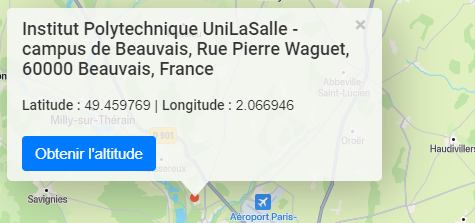


In [86]:
lat_lasalle = 49.459769 
long_lasalle = 2.066946
coords_lasalle = (lat_lasalle, long_lasalle)

In [87]:
d = {'prefix_vols_fr': liste_vols_fr, 'id_vols_fr': id_vols_fr,
     'distance_campus': [geopy.distance.geodesic(coords_lasalle, (vol.latitude, vol.longitude)).km for vol in vols_fr]}
df = pd.DataFrame(data=d)
df
df.sort_values(by='distance_campus')

,prefix_vols_fr,id_vols_fr,distance_campus
16,D-CICU,2e3dded4,0.248160
529,YR-JOY,2e3db4ad,7.154333
219,PH-DWC,2e3db422,11.635507
345,EI-DEM,2e3ddf94,18.073737
142,LN-NOD,2e3dd6d3,29.584644
...,...,...,...
95,F-GZCF,2e3ddd57,855.715520
46,F-HTVZ,2e3dd183,861.699192
278,OE-ICR,2e3dfe9f,880.055754
144,HB-JCR,2e3de763,893.091364


In [88]:
# Interroger si un vol est dans la liste
vol = 'D-AIWI'
if vol in liste_vols_fr:
  a = liste_vols_fr.index(vol)
  print(a),print(vols_fr[a])
else:
  print('RAS')

RAS


In [89]:
vol_details = fr_api.get_flight_details(id_vols_fr[a])

vol_lat = vol_details['trail'][0]['lat']
vol_long = vol_details['trail'][0]['lng']
coords_vol = (vol_lat,vol_long)

coords_vol,geopy.distance.geodesic(coords_lasalle, coords_vol).km

((50.355976, 8.250881), 455.1094849561247)

In [90]:
vol = vols_fr[a]

(vol.latitude, vol.longitude), geopy.distance.geodesic(coords_lasalle, (vol.latitude, vol.longitude)).km

((50.356, 8.251), 455.11829386327014)

In [91]:
df['distance_campus'] = [geopy.distance.geodesic(coords_lasalle, (vol.latitude, vol.longitude)).km for vol in vols_fr]

In [94]:
df_campus = df[df['distance_campus'] < 100]
df_campus

,prefix_vols_fr,id_vols_fr,distance_campus
1,9H-PRO,2e3de5c7,98.498163
6,CS-GLA,2e3df7ca,32.049367
16,D-CICU,2e3dded4,0.248160
27,G-EZWX,2e3de904,51.534444
50,SP-OOK,2e3ddbbe,85.912425
...,...,...,...
651,N/A,2e3dabce,58.631938
655,RX04,2e3dcde6,62.803933
657,F-GTAM,2e3dcb2f,63.986421
658,EC-MGZ,2e3dcaf6,84.594946


In [93]:
if len(df_campus) > 0:
  print('Oui, il y a '+str(len(df_campus))+ ' avions a moins de 15Km du campus.')
else:
  print('RAS')

Oui, il y a 3 avions a moins de 15Km du campus.
